# Neural Networks

How can we automatically separate two groups of data? I've placed red triangles and green circles in a 2D space. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

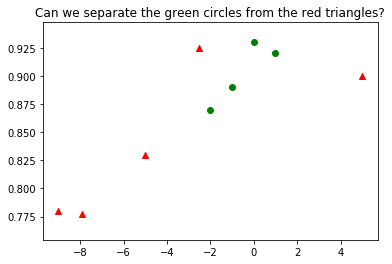

In [2]:
plt.scatter([-7.9, -9, -5, -2.5, 5.0], [.777, .78, .83, .925, .9], marker='^', color='r');
plt.scatter([-2,-1, 0,1], [.87,.89, .93, .92], marker='o', color='g');
plt.title('Can we separate the green circles from the red triangles?');

# First. Start with 3 simple lines.

In [3]:
b1 = [2, 0.5]  # This is the intercept (b) and slope (m) of line 1
b2 = [5, 2]    # This is the intercept (b) and slope (m) of line 2
b3 = [2, -1]   # This is the intercept (b) and slope (m) of line 3

x = np.linspace(-10,10, 1000)  # Let's get 1000 points from -10 to 10

In [4]:
y1 = []
y2 = []
y3 = []

for i in range(len(x)):
    
    y1 += [b1[0] + b1[1]*x[i]]   # This is just the equation of a line y = mx + b
    y2 += [b2[0] + b2[1]*x[i]]
    y3 += [b3[0] + b3[1]*x[i]]

# Here's how the lines separate the data

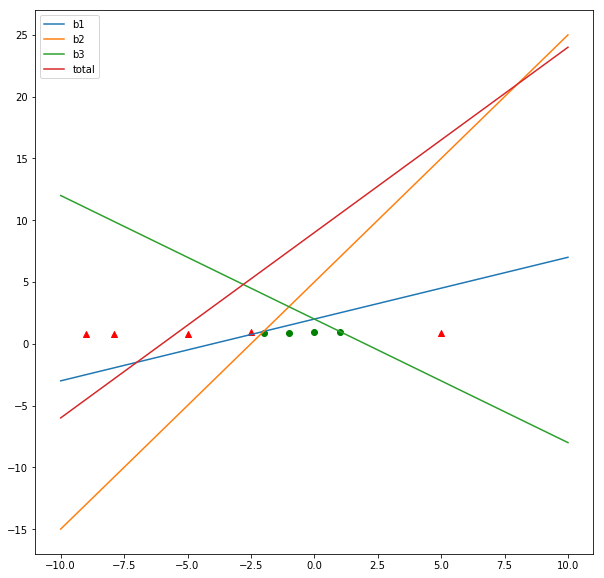

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x,y1);
plt.plot(x,y2);
plt.plot(x,y3);
plt.plot(x, np.array(y1)+np.array(y2)+np.array(y3))
plt.legend(['b1', 'b2', 'b3', 'total']);
plt.scatter([-7.9, -9, -5, -2.5, 5.0], [.777, .78, .83, .925, .9], marker='^', color='r');
plt.scatter([-2,-1, 0,1], [.87,.89, .93, .92], marker='o', color='g');

## Not great, but not bad either. 

These lines are basically like simple decision trees. 

If we can combine these lines, then we'd have a decent classifier to determine green circle from red triangle. But perhaps we can do better? What if we add a slight non-linearity in-- the sigmoid function $\frac{1}{1 + \exp^{-y}}$. The idea here is to bend the line in the middle. That will help us get tighter fits.



In [6]:
yActivate1 = []
yActivate2 = []
yActivate3 = []

for i in range(len(x)):
    
    yActivate1 += [1.0 / (1.0 + np.exp(-y1[i]))]  # The sigmoid function 
    yActivate2 += [1.0 / (1.0 + np.exp(-y2[i]))]
    yActivate3 += [1.0 / (1.0 + np.exp(-y3[i]))]

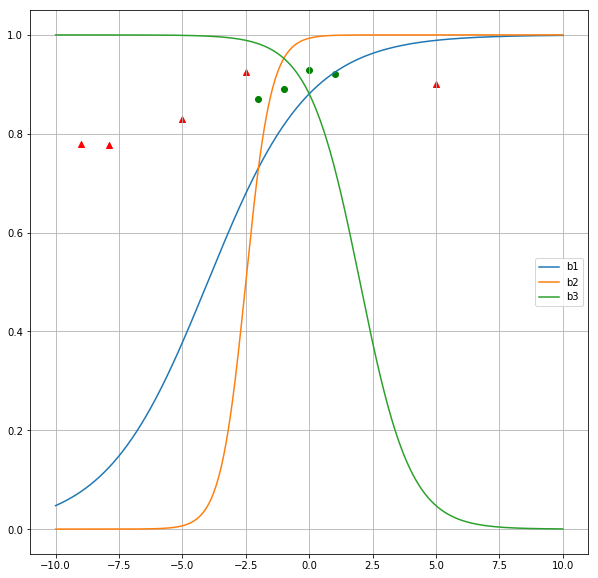

In [7]:
plt.figure(figsize=(10,10))
plt.plot(x,yActivate1, x, yActivate2, x, yActivate3);
plt.grid();
plt.legend(['b1', 'b2', 'b3']);
plt.scatter([-7.9, -9, -5, -2.5, 5.0], [.777, .78, .83, .925, .9], marker='^', color='r');
plt.scatter([-2,-1, 0,1], [.87,.89, .93, .92], marker='o', color='g');

## Now let's add these three lines together and run them through one more sigmoid function

So this is layer 2 of the neural network.

In [8]:
ySecondLayerLine = []
yActivateSecondLayer = []

for i in range(len(x)):
    
    ySecondLayerLine += [.1 + yActivate1[i] + yActivate2[i] + yActivate3[i]]
    yActivateSecondLayer += [1.0 / (1.0 + np.exp(-ySecondLayerLine[i]))]

## NOTE

For the second layer, I've made all of the weights 1 except for the bias weight (0.1). 

So the line for layer 2 is (0.1 + 1\*yActivate1 + 1\*yActivate2 + 1\*yActivate3) and we pass that into the activation sigmoid function.

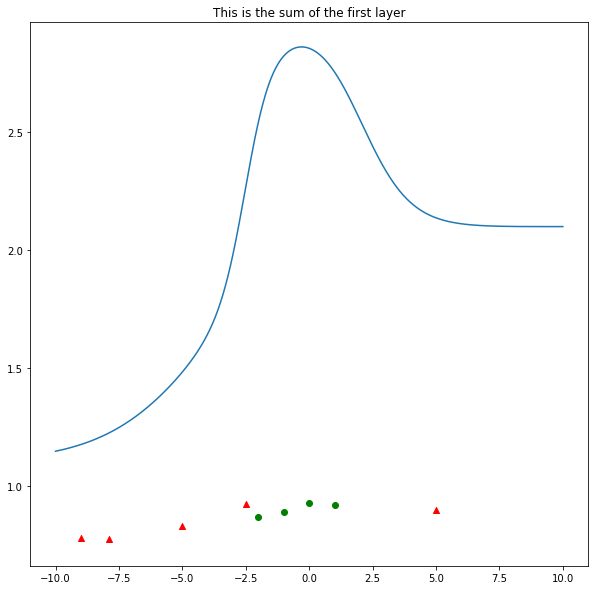

In [9]:
plt.figure(figsize=(10,10))
plt.plot(x,ySecondLayerLine);
plt.scatter([-7.9, -9, -5, -2.5, 5.0], [.777, .78, .83, .925, .9], marker='^', color='r');
plt.scatter([-2,-1, 0,1], [.87,.89, .93, .92], marker='o', color='g');
plt.title("This is the sum of the first layer");

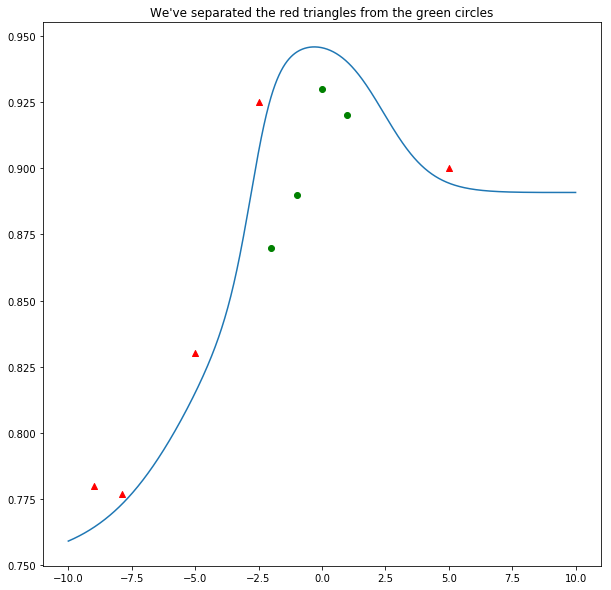

In [10]:
plt.figure(figsize=(10,10))
plt.plot(x,yActivateSecondLayer);
plt.scatter([-7.9, -9, -5, -2.5, 5.0], [.777, .78, .83, .925, .9], marker='^', color='r');
plt.scatter([-2,-1, 0,1], [.87,.89, .93, .92], marker='o', color='g');
plt.title("We've separated the red triangles from the green circles");

This is a sketch of what this neural network looks like.

![nn](simpleNN.png)